# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [87]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"

city_url = url + "appid=" + weather_api_key + "&units=metric" + "&q=" + city 
#print(city_url)
city_weather = requests.get(city_url).json()
city_weather#["dt"]#["country"]


{'coord': {'lon': -97.8558, 'lat': 55.7435},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 7.51,
  'feels_like': 6.12,
  'temp_min': 7.51,
  'temp_max': 7.51,
  'pressure': 1013,
  'humidity': 82,
  'sea_level': 1013,
  'grnd_level': 988},
 'visibility': 10000,
 'wind': {'speed': 2.19, 'deg': 206, 'gust': 2.77},
 'clouds': {'all': 86},
 'dt': 1697501368,
 'sys': {'country': 'CA', 'sunrise': 1697461422, 'sunset': 1697498999},
 'timezone': -18000,
 'id': 6165406,
 'name': 'Thompson',
 'cod': 200}

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=metric" + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | safotu
Processing Record 2 of Set 1 | bankim
Processing Record 3 of Set 1 | aasiaat
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | ketchikan
Processing Record 7 of Set 1 | hamilton
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | papatowai
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | keflavik
Processing Record 14 of Set 1 | port lincoln
Processing Record 15 of Set 1 | olonkinbyen
Processing Record 16 of Set 1 | the pas
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | bathsheba
Processing Record 19 of Set 1 | coyhaique
Processing Record 20 of Set 1 | uturoa
Processing Record 21 of Set 1 | roma
Processing Record 22 of Set 1 | av

Processing Record 39 of Set 4 | ironwood
Processing Record 40 of Set 4 | iskateley
Processing Record 41 of Set 4 | tiksi
Processing Record 42 of Set 4 | itupiranga
Processing Record 43 of Set 4 | port hedland
Processing Record 44 of Set 4 | sandnessjoen
Processing Record 45 of Set 4 | new mirpur
Processing Record 46 of Set 4 | swakopmund
Processing Record 47 of Set 4 | flying fish cove
Processing Record 48 of Set 4 | chiili
City not found. Skipping...
Processing Record 49 of Set 4 | greymouth
Processing Record 0 of Set 5 | hasaki
Processing Record 1 of Set 5 | katsuura
Processing Record 2 of Set 5 | carnarvon
Processing Record 3 of Set 5 | champerico
Processing Record 4 of Set 5 | vila franca do campo
Processing Record 5 of Set 5 | chonchi
Processing Record 6 of Set 5 | eraan
Processing Record 7 of Set 5 | tadine
Processing Record 8 of Set 5 | portland
Processing Record 9 of Set 5 | berezovyy
Processing Record 10 of Set 5 | charlottetown
Processing Record 11 of Set 5 | shimoda
Processi

Processing Record 29 of Set 8 | nejo
Processing Record 30 of Set 8 | sola
Processing Record 31 of Set 8 | tolanaro
Processing Record 32 of Set 8 | zhangye
Processing Record 33 of Set 8 | silute
Processing Record 34 of Set 8 | alice springs
Processing Record 35 of Set 8 | susuman
Processing Record 36 of Set 8 | murzuq
Processing Record 37 of Set 8 | say
Processing Record 38 of Set 8 | tranovaho
City not found. Skipping...
Processing Record 39 of Set 8 | whakatane
Processing Record 40 of Set 8 | souillac
Processing Record 41 of Set 8 | phan rang-thap cham
Processing Record 42 of Set 8 | bonthe
Processing Record 43 of Set 8 | borda da mata
Processing Record 44 of Set 8 | huangshi
Processing Record 45 of Set 8 | rongelap
Processing Record 46 of Set 8 | bloemfontein
Processing Record 47 of Set 8 | kashgar
Processing Record 48 of Set 8 | kokstad
Processing Record 49 of Set 8 | kuala tungkal
Processing Record 0 of Set 9 | mandla
Processing Record 1 of Set 9 | mbanza kongo
Processing Record 2 

Processing Record 18 of Set 12 | dingzhou
Processing Record 19 of Set 12 | kill devil hills
Processing Record 20 of Set 12 | nagqu
Processing Record 21 of Set 12 | chernyshevsk
Processing Record 22 of Set 12 | segezha
Processing Record 23 of Set 12 | nuku'alofa
Processing Record 24 of Set 12 | martil
Processing Record 25 of Set 12 | merritt
Processing Record 26 of Set 12 | belfast
Processing Record 27 of Set 12 | south hedland
Processing Record 28 of Set 12 | turkmenbasy
Processing Record 29 of Set 12 | tura
Processing Record 30 of Set 12 | pacasmayo
Processing Record 31 of Set 12 | kamina
Processing Record 32 of Set 12 | belmonte
Processing Record 33 of Set 12 | larvik
Processing Record 34 of Set 12 | san antonio de pale
Processing Record 35 of Set 12 | i-n-salah
Processing Record 36 of Set 12 | vila velha
Processing Record 37 of Set 12 | formosa
Processing Record 38 of Set 12 | saba
Processing Record 39 of Set 12 | oudtshoorn
Processing Record 40 of Set 12 | conception bay south
Proc

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,safotu,-13.4513,-172.4018,27.39,81,80,10.68,WS,1697501371
1,bankim,6.0830,11.4905,19.51,96,100,0.24,CM,1697501371
2,aasiaat,68.7098,-52.8699,-10.60,98,97,4.06,GL,1697501372
3,ushuaia,-54.8000,-68.3000,7.81,98,75,7.20,AR,1697501196
4,albany,42.6001,-73.9662,11.43,77,81,1.85,US,1697501372


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,safotu,-13.4513,-172.4018,27.39,81,80,10.68,WS,1697501371
1,bankim,6.0830,11.4905,19.51,96,100,0.24,CM,1697501371
2,aasiaat,68.7098,-52.8699,-10.60,98,97,4.06,GL,1697501372
3,ushuaia,-54.8000,-68.3000,7.81,98,75,7.20,AR,1697501196
4,albany,42.6001,-73.9662,11.43,77,81,1.85,US,1697501372


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

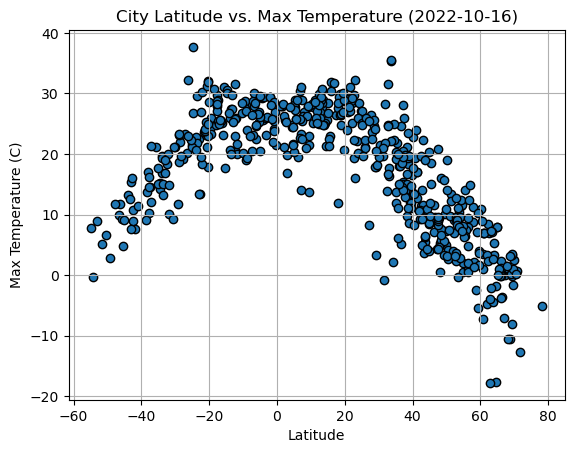

In [27]:
# Build scatter plot for latitude vs. temperature
latidues = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
plt.scatter(latitidues, max_temp, edgecolors = "black")

# Incorporate the other graph properties
plt.grid()
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Max Temperature (2022-10-16)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

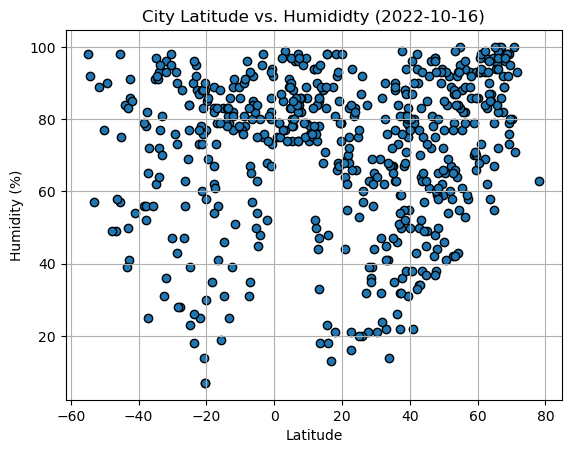

In [28]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df["Humidity"]
plt.scatter(latitidues, humidity, edgecolors = "black")

# Incorporate the other graph properties
plt.grid()
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Humididty (2022-10-16)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

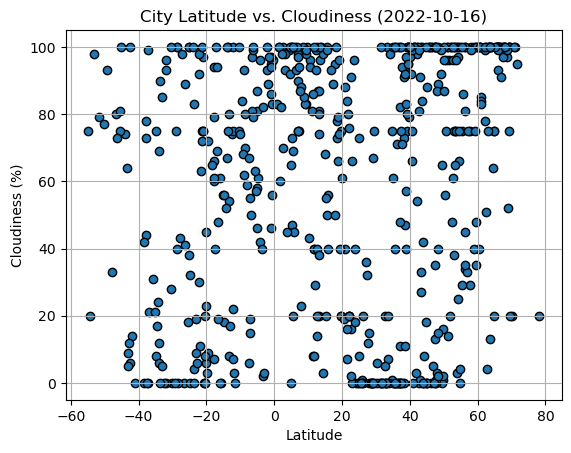

In [32]:
# Build the scatter plots for latitude vs. cloudiness
clouds = city_data_df["Cloudiness"]
plt.scatter(latitidues, clouds, edgecolors = "black")

# Incorporate the other graph properties
plt.grid()
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Cloudiness (2022-10-16)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

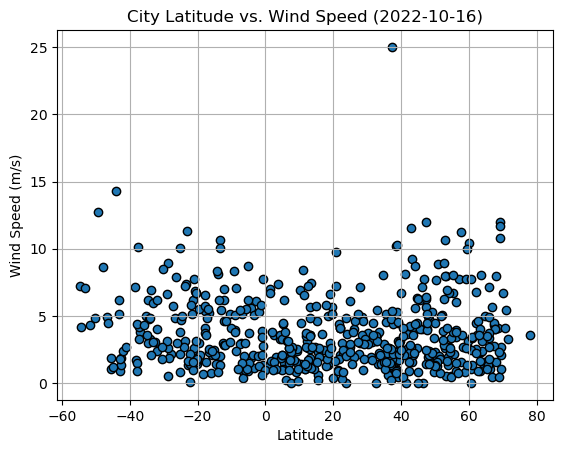

In [33]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df["Wind Speed"]
plt.scatter(latitidues, wind_speed, edgecolors = "black")


# Incorporate the other graph properties
plt.grid()
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Wind Speed (2022-10-16)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [58]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    return(regress_values, slope, intercept)

In [59]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bankim,6.0830,11.4905,19.51,96,100,0.24,CM,1697501371
2,aasiaat,68.7098,-52.8699,-10.60,98,97,4.06,GL,1697501372
4,albany,42.6001,-73.9662,11.43,77,81,1.85,US,1697501372
5,ketchikan,55.3422,-131.6461,13.99,88,75,6.69,US,1697501372
6,hamilton,39.1834,-84.5333,12.07,81,100,3.09,US,1697501372


In [60]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,safotu,-13.4513,-172.4018,27.39,81,80,10.68,WS,1697501371
3,ushuaia,-54.8000,-68.3000,7.81,98,75,7.20,AR,1697501196
7,waitangi,-43.9535,-176.5597,13.31,84,74,14.30,NZ,1697501372
8,papatowai,-46.5619,169.4708,9.89,49,80,4.89,NZ,1697501372
9,adamstown,-25.0660,-130.1015,22.12,84,38,3.83,PN,1697501373


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.8563268602897401


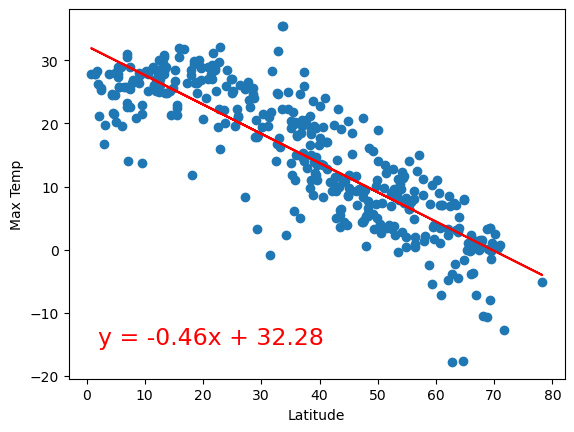

In [115]:
# Linear regression on Northern Hemisphere
north_lat = northern_hemi_df["Lat"]
north_temp = northern_hemi_df["Max Temp"]
plt.scatter(north_lat, north_temp)

regress_values, slope, intercept = linear_regression(north_lat, north_temp)
equation_string = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(north_lat, regress_values, "r-")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.text(2, -15, equation_string, fontsize = 17,  color = 'r')

print(f"The r-value is: {st.pearsonr(north_lat, north_temp)[0]*-1}")
      

The r-value is: 0.7724512821021023


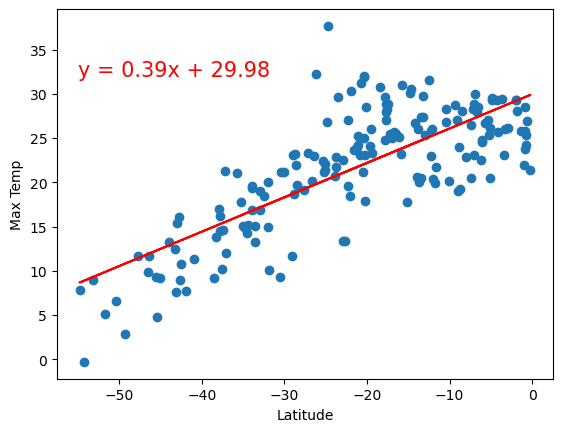

In [99]:
# Linear regression on Southern Hemisphere
south_lat = southern_hemi_df["Lat"]
south_temp = southern_hemi_df["Max Temp"]
plt.scatter(south_lat, south_temp)

regress_values, slope, intercept = linear_regression(south_lat, south_temp)
equation_string = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(south_lat, regress_values, "r-")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.text(-55, 32, equation_string, fontsize = 15,  color = 'r')

print(f"The r-value is: {st.pearsonr(south_lat, south_temp)[0]}")


**Discussion about the linear relationship:** The linear regression is plotting the relationship between the maximum temperature and the latitude. Here we see a very obvious relationship, the closer you get to the equator the hotter it gets. The farther you get, the colder it gets. The high r-value supports that this is a strong relationship

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.10612388932551259


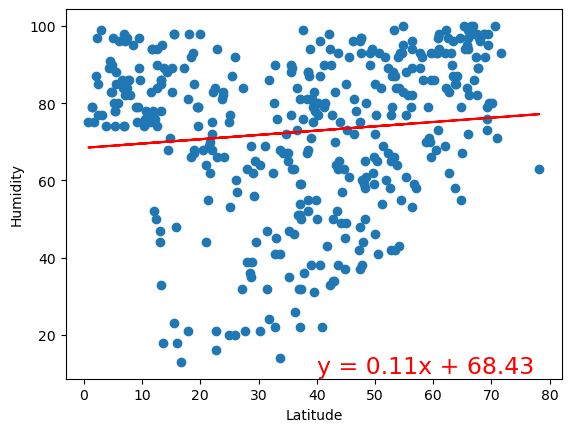

In [103]:
# Northern Hemisphere
north_hum = northern_hemi_df["Humidity"]
plt.scatter(north_lat, north_hum)

regress_values, slope, intercept = linear_regression(north_lat, north_hum)
equation_string = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(north_lat, regress_values, "r-")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.text(40, 10, equation_string, fontsize = 17,  color = 'r')

print(f"The r-value is: {st.pearsonr(north_lat, north_hum)[0]}")

The r-value is: 0.051750543338885346


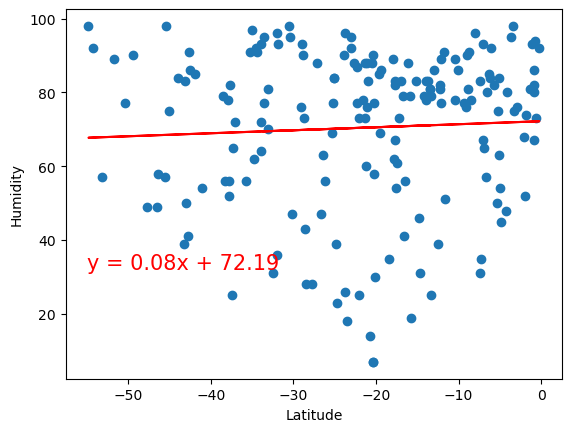

In [105]:
# Southern Hemisphere
south_hum = southern_hemi_df["Humidity"]
plt.scatter(south_lat, south_hum)

regress_values, slope, intercept = linear_regression(south_lat, south_hum)
equation_string = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(south_lat, regress_values, "r-")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.text(-55, 32, equation_string, fontsize = 15,  color = 'r')

print(f"The r-value is: {st.pearsonr(south_lat, south_hum)[0]}")

**Discussion about the linear relationship:** The linear regression is plotting the relationship between the humidity and the latitude. There does not seem to be a strong relationship between humidity and closeness to the equator. The plots seem very scattered with no cooerelation. The low r-values support the conclusion that theres no connection between humidity and latitude. This might be due to humidity being affected by many factors like amount if water in the air and wind.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.10683624587691337


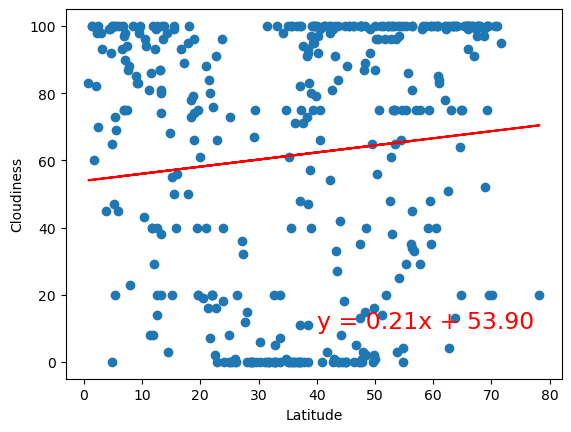

In [109]:
# Northern Hemisphere
north_clouds = northern_hemi_df["Cloudiness"]
plt.scatter(north_lat, north_clouds)

regress_values, slope, intercept = linear_regression(north_lat, north_clouds)
equation_string = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(north_lat, regress_values, "r-")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.text(40, 10, equation_string, fontsize = 17,  color = 'r')

print(f"The r-value is: {st.pearsonr(north_lat, north_clouds)[0]}")

The r-value is: 0.16877623463751174


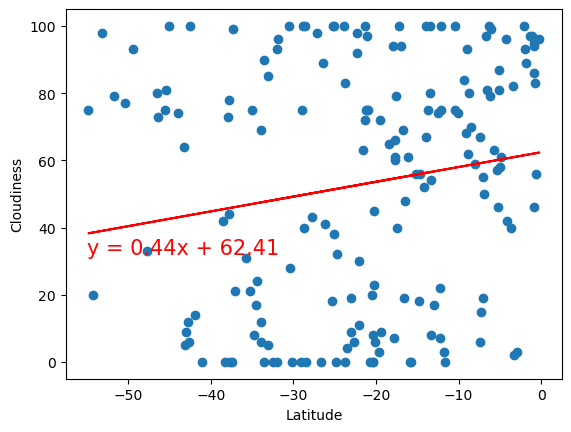

In [110]:
# Southern Hemisphere
south_clouds = southern_hemi_df["Cloudiness"]
plt.scatter(south_lat, south_clouds)

regress_values, slope, intercept = linear_regression(south_lat, south_clouds)
equation_string = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(south_lat, regress_values, "r-")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.text(-55, 32, equation_string, fontsize = 15,  color = 'r')

print(f"The r-value is: {st.pearsonr(south_lat, south_clouds)[0]}")

**Discussion about the linear relationship:**  The linear regression is plotting the relationship between the cloudiness and the latitude. There does not seem to be a strong relationship between cloudiness and closeness to the equator. The plots seem very scattered with no cooerelation. The low r-values support the conclusion that theres no connection between cloudiness and latitude. This might be due to the fact that other factors beyond temperature, that lead to cloud phenomena. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.14520808964272053


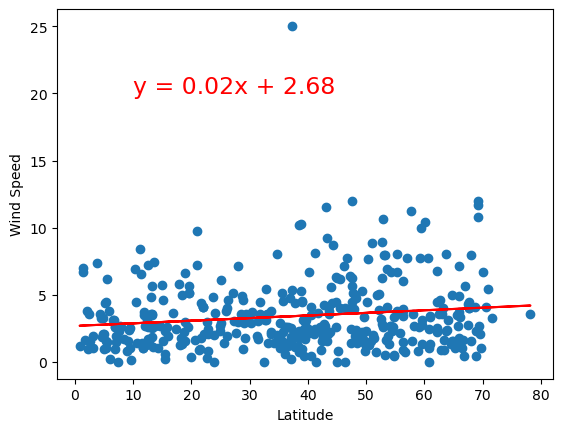

In [116]:
# Northern Hemisphere
north_speed = northern_hemi_df["Wind Speed"]
plt.scatter(north_lat, north_speed)

regress_values, slope, intercept = linear_regression(north_lat, north_speed)
equation_string = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(north_lat, regress_values, "r-")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.text(10, 20, equation_string, fontsize = 17,  color = 'r')

print(f"The r-value is: {st.pearsonr(north_lat, north_speed)[0]}")

The r-value is: 0.15561156353682193


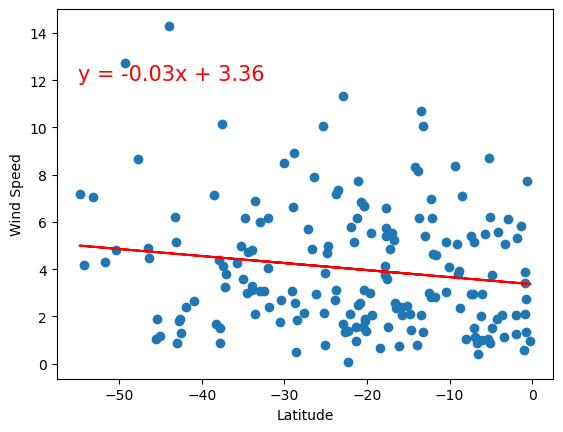

In [117]:
# Southern Hemisphere
south_speed = southern_hemi_df["Wind Speed"]
plt.scatter(south_lat, south_speed)

regress_values, slope, intercept = linear_regression(south_lat, south_speed)
equation_string = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(south_lat, regress_values, "r-")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.text(-55, 12, equation_string, fontsize = 15,  color = 'r')

print(f"The r-value is: {st.pearsonr(south_lat, south_speed)[0]*-1}")

**Discussion about the linear relationship:**  The linear regression is plotting the relationship between the wind speed and the latitude. There does not seem to be a strong relationship between wind speed and closeness to the equator. there is a decline in wind speed as you get closer to the equator but the r-values tell us that this is a very wear coerrelation.  